# Welcome to SQL Saturday 2022 Oregon & SW Washington

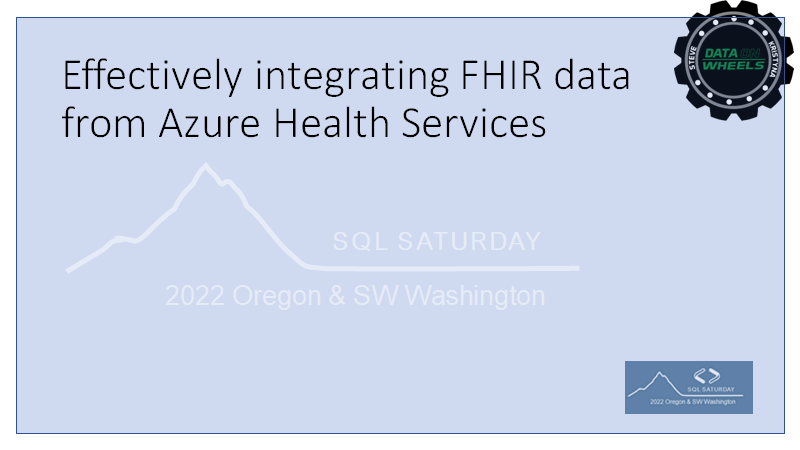

# 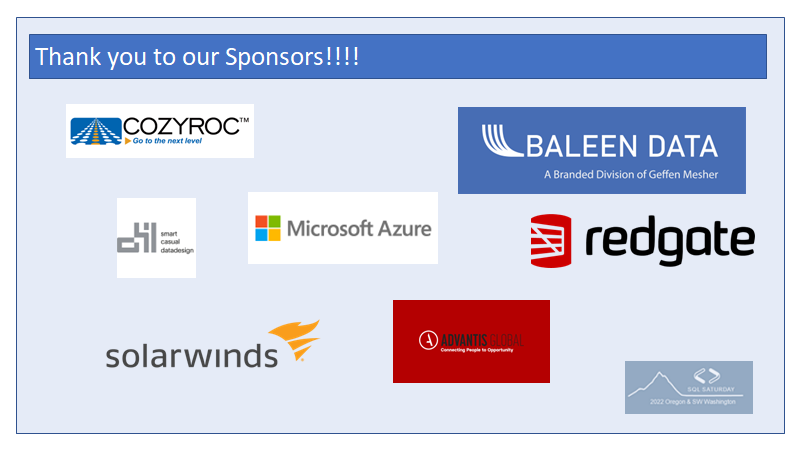

# Effectively integrating FHIR data from Azure Health Services

<span style="font-family: sans-serif; font-size: 16px;">With the recent updated mandates in the healthcare environment in the United states, Microsoft has continued to expand its capability to support the FHIR standard for integrating healthcare data. While the standard is well documented and Microsoft’s capabilities are expansive, it falls on data professionals to interpret that data and build meaningful reports and produce meaningful insights from the data as it's collected and integrated across environments. This requires a good working knowledge of JSON in SQL to manipulate fairly complex data models. In this session we will do a short review of the FHIR standard and the overall implementation of FHIR in Azure. From there we will see the resulting data in the data lake and in Synapse and create meaningful views and queries that can be used in reporting or analysis. We will jump from the overview into the heart of complex SQL using JSON functions in Synapse. Whether or not you are active in healthcare today, this will be an enlightening session on how to use JSON SQL functions within the Azure SQL platforms.</span>

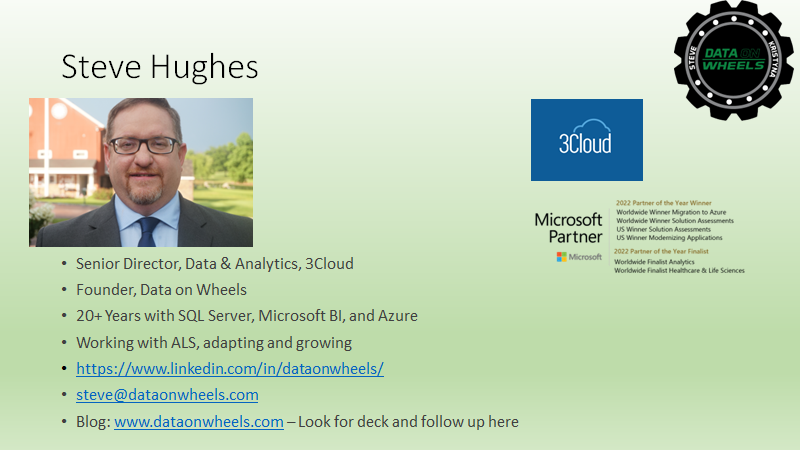

## I am happy to introduce my wife **Sheila** who will be helping with the presentation today. 

## She will be navigating the notebook as we work through the presentation and the demos.

# What is FHIR and why should I care?

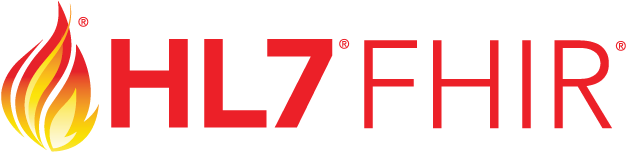

- <span style="font-size: 14px;">Fast Healthcare Interoperability Resources (FHIR) specification</span>
- <span style="font-size: 14px;">FHIR is a standard for exchanging healthcare information electronically</span>
- **<span style="font-size: 14px;">Fast</span> has nothing to do with performance, but more about the ability to implement and integrate quickly**
- FHIR is an international standard with regional profiles to support regional specific requirements
- FHIR is built on a basic building block called a resource which is the core exchangeable content
- All resources share the following characteristics
    - A common way to define and represent the resource including data types and patterns
    - A common set of metadata which can be discovered easily
    - A human readable part

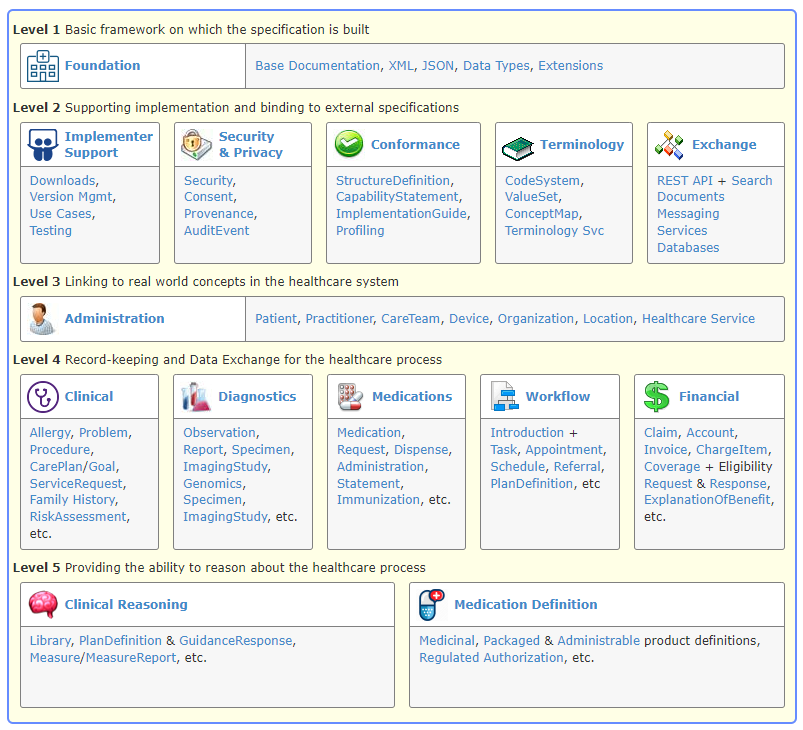<span style="font-size: 14px;"><br></span>

To find out more about FHIR you will need to become familiar with their site at [http://hl7.org/fhir/](http://hl7.org/fhir/)

# <span style="font-size: 28px;">Azure Health Services and the FHIR API</span>

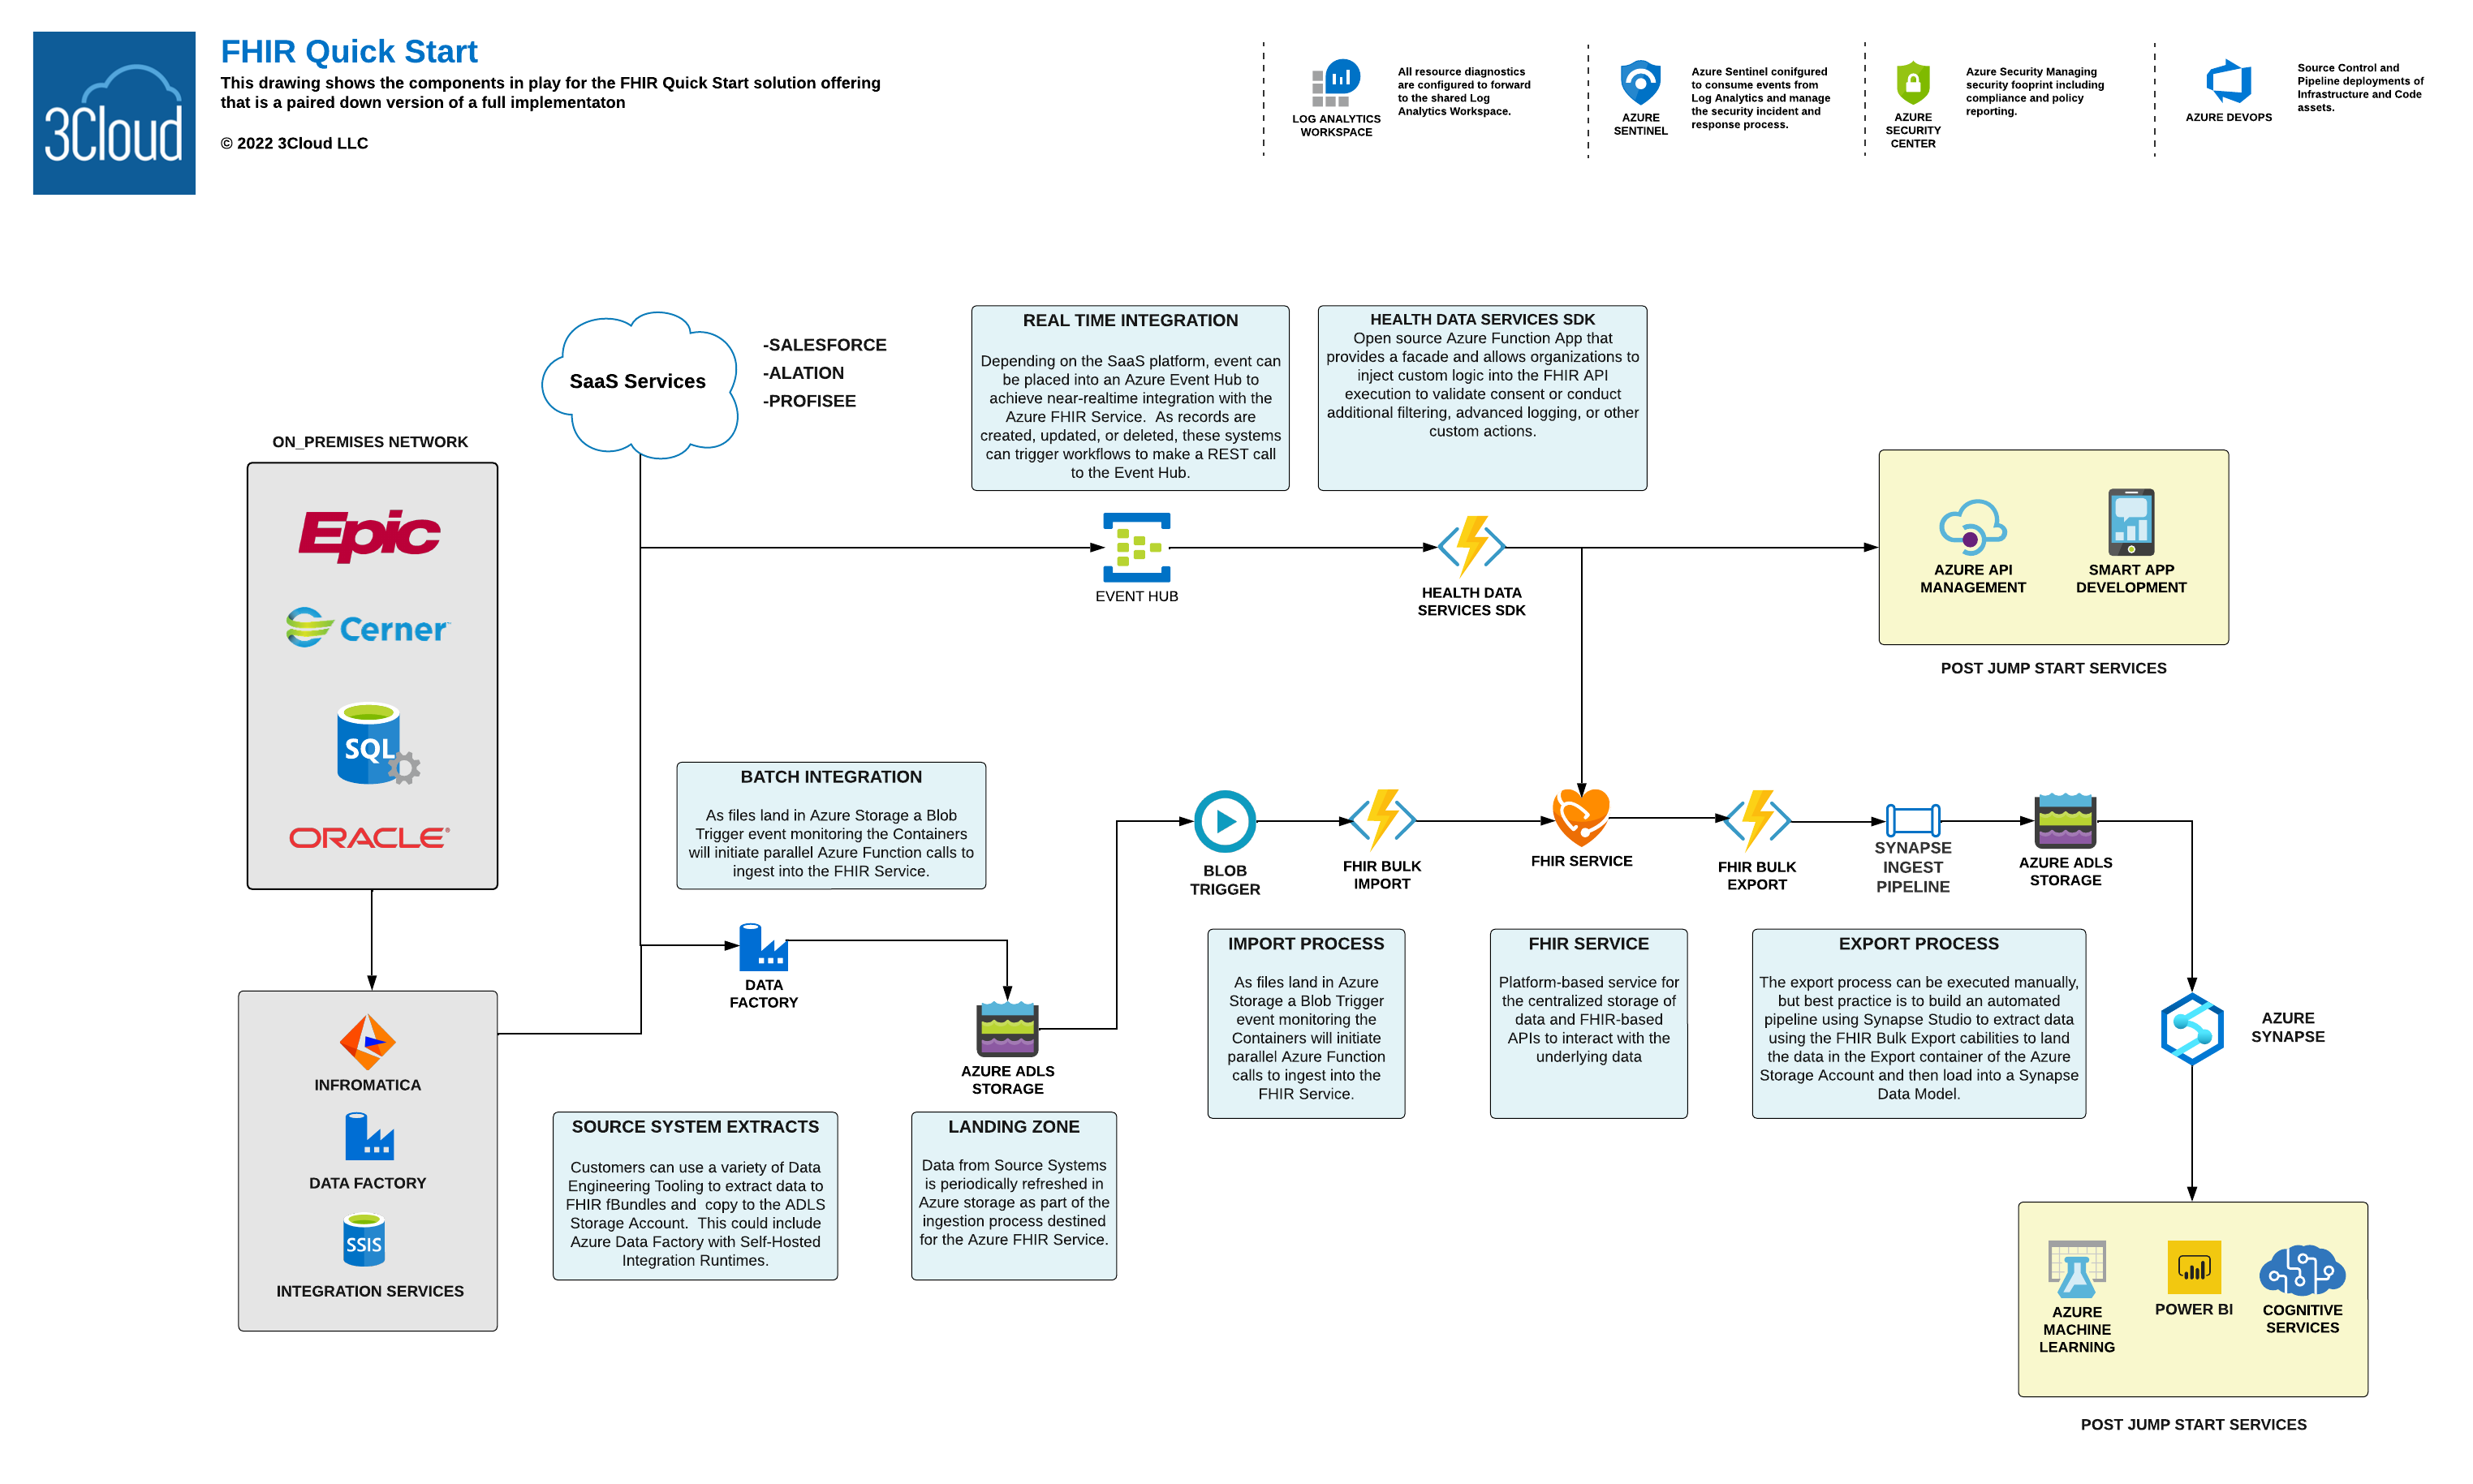<span style="font-size: 28px;"><br></span>

# JSON Functions
## ISJSON
### Determines if text is formatted as JSON
## JSON_VALUE
### Return scalar values from JSON
---
## OPENJSON
### Converts JSON to tabular format
## Using the CROSS APPLY operator
### Allows you to join with relational data

---
# JSON Path in SQL Server 

$ = context

$.[object or array]

$.[object or array].[object]

- You can nest objects very deeply, but only one array can be referenced in OPENJSON

$.[object].[array][n] returns object from array – zero based


# <span style="font-size: 28px;">The Demo: Shaping the Patient Resource</span>

[Patient - FHIR v4.3.0 (hl7.org)](http://hl7.org/fhir/patient.html)

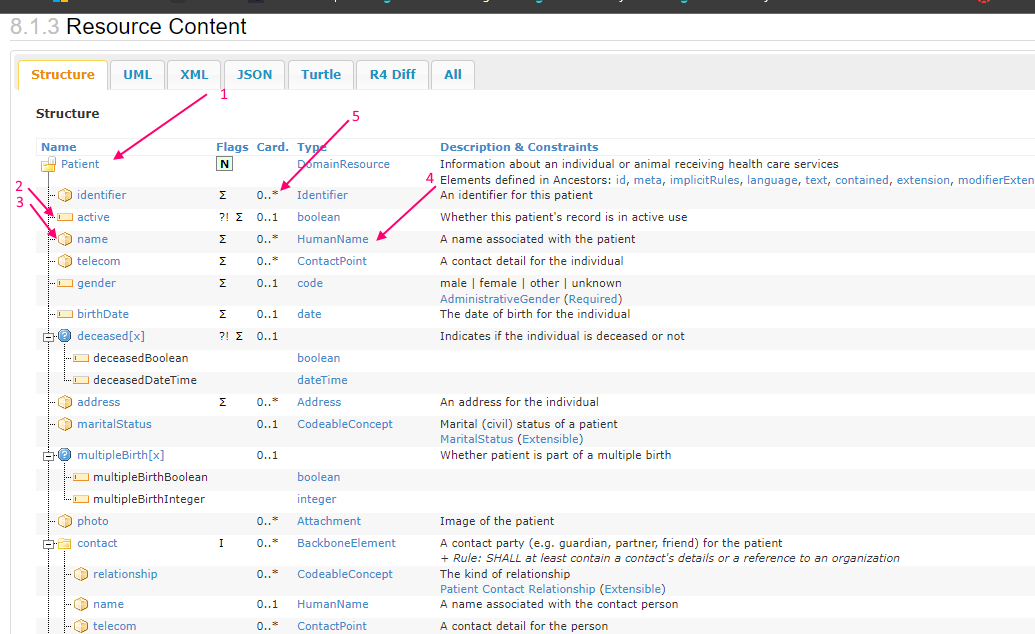

1. name of the resource
2. example of a single valued property
3. example of an array property
4. link to the array definition
5. cardinality which shows actual cardinality and if this is required

## HumanName Array Definition

One key feature to understand around the FHIR specification is that it is highly documented with links including links within the JSON definitions itself when it varies from the original definition. In this case we're going to show you the HumanName array definition. You will get to the first definition shown below by clicking the link above in the Patient resource that says HumanName.

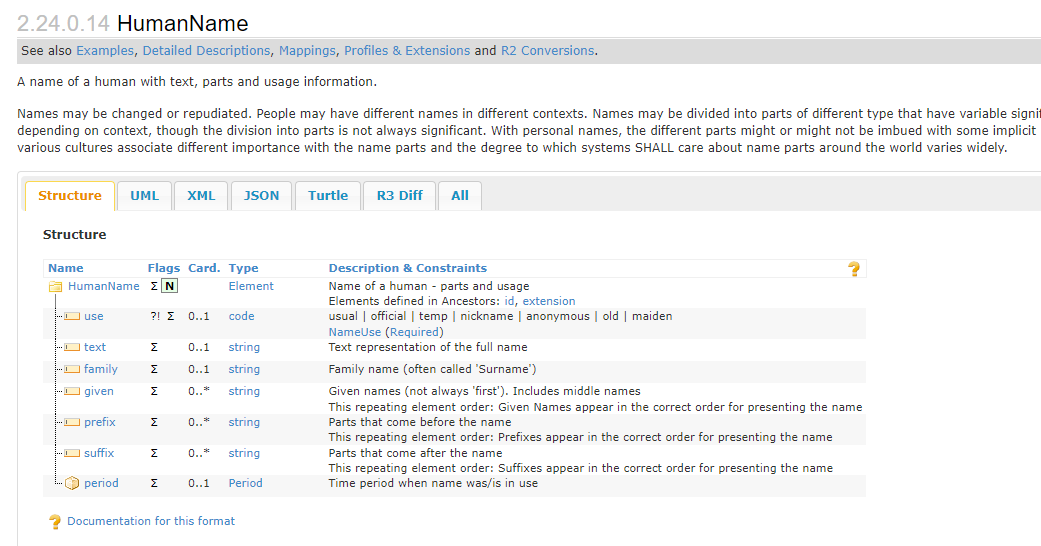

You can further dive into the definition of the Use attribute as shown below:

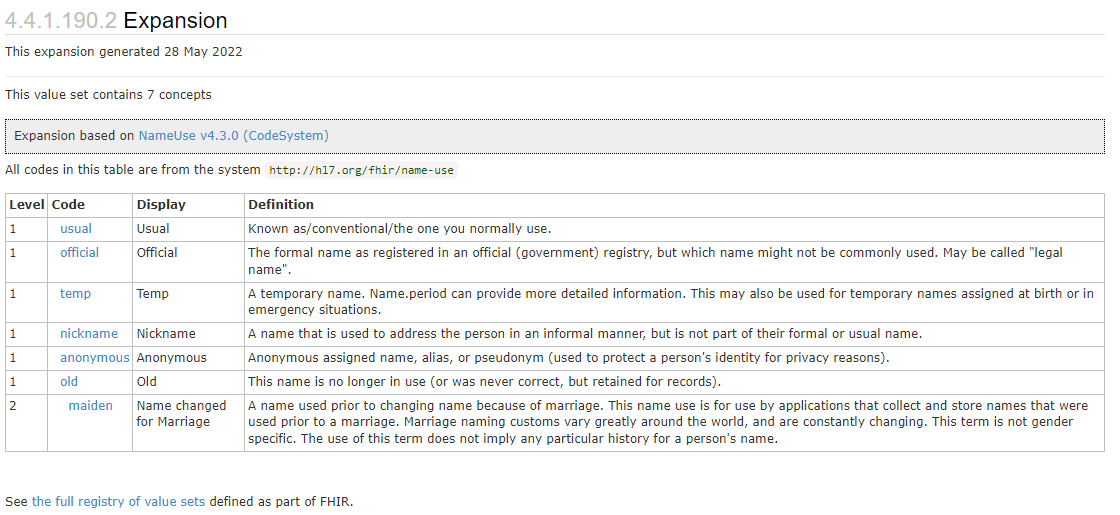

## A sample JSON file for a patient resource

{

    <span style="color: #9cdcfe;">"resourceType"</span>: <span style="color: #ce9178;">"Patient"</span>,

    <span style="color: #9cdcfe;">"id"</span>: <span style="color: #ce9178;">"e8b835f7-0c46-4166-22ad-23e6783aaf54"</span>,

    <span style="color: #9cdcfe;">"identifier"</span>: \[

        {

            <span style="color: #9cdcfe;">"use"</span>: <span style="color: #ce9178;">"usual"</span>,

            <span style="color: #9cdcfe;">"type"</span>: {

                <span style="color: #9cdcfe;">"coding"</span>: \[

                    {

                        <span style="color: #9cdcfe;">"system"</span>: <span style="color: #ce9178;">"http://terminology.hl7.org/CodeSystem/v2-0203"</span>,

                        <span style="color: #9cdcfe;">"code"</span>: <span style="color: #ce9178;">"MR"</span>

                    }

                \]

            },

            <span style="color: #9cdcfe;">"system"</span>: <span style="color: #ce9178;">"urn:oid:2.16.840.1.113883.19.5"</span>,

            <span style="color: #9cdcfe;">"value"</span>: <span style="color: #ce9178;">"M0R1N2"</span>

        }

    \],

    <span style="color: #9cdcfe;">"active"</span>: <span style="color: #569cd6;">true</span>,

    <span style="color: #9cdcfe;">"name"</span>: \[

        {

            <span style="color: #9cdcfe;">"family"</span>: <span style="color: #ce9178;">"Smith"</span>,

            <span style="color: #9cdcfe;">"given"</span>: \[

                <span style="color: #ce9178;">"Jerry"</span>

            \]

        }

    \],

    <span style="color: #9cdcfe;">"telecom"</span>: \[

        {

            <span style="color: #9cdcfe;">"system"</span>: <span style="color: #ce9178;">"phone"</span>,

            <span style="color: #9cdcfe;">"value"</span>: <span style="color: #ce9178;">"1234-5678"</span>

        },

        {

            <span style="color: #9cdcfe;">"system"</span>: <span style="color: #ce9178;">"phone"</span>,

            <span style="color: #9cdcfe;">"value"</span>: <span style="color: #ce9178;">"1234-5679"</span>

        }

    \],

    <span style="color: #9cdcfe;">"gender"</span>: <span style="color: #ce9178;">"male"</span>,

    <span style="color: #9cdcfe;">"birthDate"</span>: <span style="color: #ce9178;">"2001-01-10"</span>,

    <span style="color: #9cdcfe;">"managingOrganization"</span>: {

        <span style="color: #9cdcfe;">"reference"</span>: <span style="color: #ce9178;">"Organization/2.16.840.1.113883.19.5"</span>,

        <span style="color: #9cdcfe;">"display"</span>: <span style="color: #ce9178;">"Good Health Clinic"</span>

    }

}

# Implementation Guides and Extensions

Before we dive into the technology, you should also be aware that the FHIR standard supports implementation guides and custom extensions to meet the needs of specific locales and jurisdictions. The following is the example from the US Core Implementation Guide related to specific attributes required for the Patient resource. Specifically you will see that race and ethnicity are added attributes to support requirements in the US health care system. The following is a snippet that shows requirements for the Patient resource in US Core:

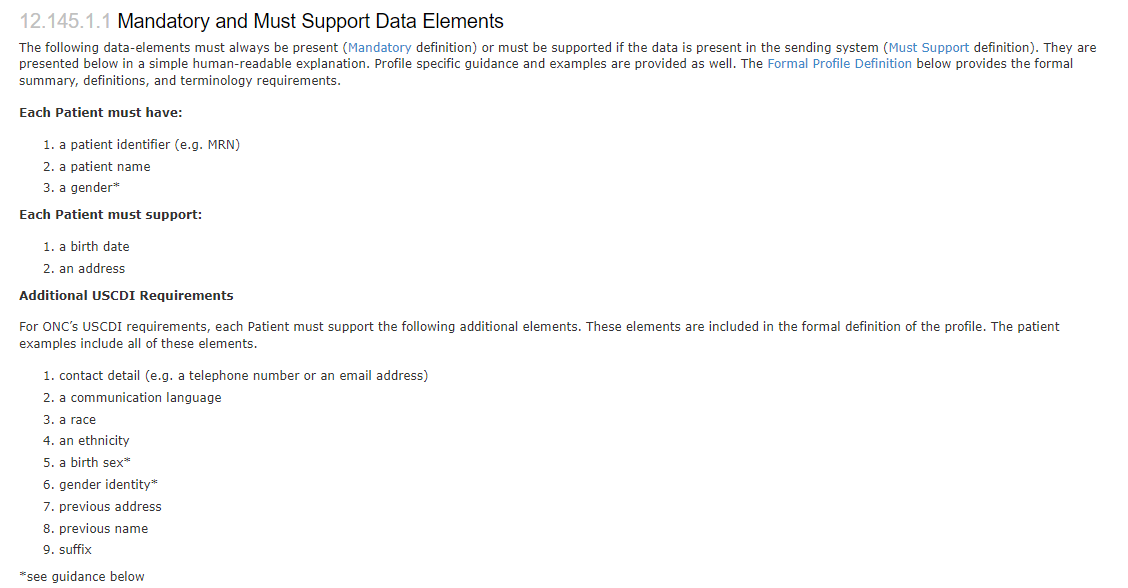

[HL7.FHIR.US.CORE\\US Core Patient Profile - FHIR v4.0.1](http://hl7.org/fhir/us/core/StructureDefinition-us-core-patient.html)

# Time to Get to the Demos

## GOAL: Use SQL with JSON functionality to build a view of the Patient resource from the results of the Azure Health Services API.

TOOLS:

- Azure Data Lake- contains the parquet files with JSON formatted data produced by the Azure FHIR API
- Azure Synapse serverless database- contains the external tables and views from Azure Health Services
- Azure Data Studio- used to run the queries

# Exercise 1: Explore the External Table

<span style="font-size: 14px;">In this first exercise, we will explore the external table created for the Patient resource. This table is created by using the schema for external tables and views provided by Microsoft in the health care services</span> [Git](https://github.com/microsoft/FHIR-Analytics-Pipelines/blob/main/FhirToDataLake/docs/Deployment.md)[Hub](https://github.com/microsoft/FHIR-Analytics-Pipelines/blob/main/FhirToDataLake/docs/Deployment.md). this script from Microsoft creates tables and views based on the extracts produced by the FHIR APIs.

[](https://github.com/microsoft/FHIR-Analytics-Pipelines/)

[  
](https://github.com/microsoft/FHIR-Analytics-Pipelines/blob/main/FhirToDataLake/docs/Deployment.md)

In [53]:
SELECT Top (20) *
FROM fhir.Patient;

SELECT Count (*)
FROM fhir.Patient;

Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Statement ID: {DAF0B723-7582-4996-B32C-4A5245112EC0} | Query hash: 0xC10423ABC95BAB0 | Distributed request ID: {66D0AB0D-9998-4432-82E4-14671EAE0441}. Total size of data scanned is 1 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(15 rows affected)

Statement ID: {1AFEEF45-17FF-4C2E-84A5-54D3B85A20D1} | Query hash: 0x8C8C15BE1FC951FD | Distributed request ID: {AA3232CD-0B9B-4DC8-87DE-D023AC137C44}. Total size of data scanned is 1 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(1 row affected)

Total execution time: 00:00:05.188

resourceType id meta.id meta.extension meta.versionId meta.lastUpdated meta.source meta.profile meta.security meta.tag implicitRules language text.id text.extension text.status text.div extension modifierExtension identifier active name telecom gender birthDate address maritalStatus.id maritalStatus.extension maritalStatus.coding maritalStatus.text photo contact communication generalPractitioner managingOrganization.id managingOrganization.extension managingOrganization.reference managingOrganization.type managingOrganization.identifier.id managingOrganization.identifier.extension managingOrganization.identifier.use managingOrganization.identifier.type managingOrganization.identifier.system managingOrganization.identifier.value managingOrganization.identifier.period managingOrganization.identifier.assigner managingOrganization.display link deceased.boolean deceased.dateTime multipleBirth.boolean multipleBirth.integer Patient d5fe6802-a680-e762-8f43-9659340b00ac NULL NULL 3 2022-05-18T14:39:52.255+00:00 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL [{"extension":[{"url":"ombCategory","valueCoding":{"code":"C","display":"C"}},{"url":"text","valueString":"C"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"}] NULL [{"type":{"coding":"[{\"system\":\"http://terminology.hl7.org/CodeSystem/v2-0203\",\"code\":\"MR\",\"display\":\"Medical record number\"}]"},"system":"http://example.com/v2-to-fhir-converter/assigning-authority-local-system-ADT1","value":"PATID1234"},{"type":{"coding":"[{\"system\":\"http://terminology.hl7.org/CodeSystem/v2-0203\",\"code\":\"SS\",\"display\":\"Social Security number\"}]"},"system":"http://example.com/v2-to-fhir-converter/assigning-authority-local-system-USSSA","value":"123456789"},{"type":{"coding":"[{\"system\":\"http://terminology.hl7.org/CodeSystem/v2-0203\",\"code\":\"SB\"}]"},"system":"http://hl7.org/fhir/sid/us-ssn","value":"444333333"},{"type":{"coding":"[{\"code\":\"DL\"}]"},"system":"http://example.com/v2-to-fhir-converter/CodeSystem/NC","value":"987654"}] NULL [{"family":"EVERYMAN","given":["ADAM","A"],"suffix":["III"]}] [{"value":"(555) 555-2004","use":"home"},{"value":"(555)555-2004","use":"work"}] male 1961-06-15 [{"line":["2222 HOME STREET"],"city":"GREENSBORO","state":"NC","postalCode":"27401-1020"},{"district":"GL"}] NULL NULL [{"system":"http://terminology.hl7.org/CodeSystem/v3-MaritalStatus","code":"S","display":"Never Married"}] NULL NULL [{"relationship":[{"coding":"[{\"code\":\"NK\",\"display\":\"NEXT OF KIN\"}]"}],"name":{"family":"NUCLEAR","given":"[\"NELDA\",\"W\"]"}}] NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL Patient 4d661053-a8d0-148c-7023-54508fd04a52 NULL NULL 1 2022-05-21T13:48:24.972+00:00 NULL ["http://hl7.org/fhir/us/core/StructureDefinition/us-core-patient"] NULL NULL NULL NULL NULL NULL generated <div xmlns="http://www.w3.org/1999/xhtml">Generated by <a href="https://github.com/synthetichealth/synthea">Synthea</a>.Version identifier: master-branch-latest
 . Person seed: -25449550756316793 Population seed: 1653140850512</div> [{"extension":[{"url":"ombCategory","valueCoding":{"system":"urn:oid:2.16.840.1.113883.6.238","code":"2106-3","display":"White"}},{"url":"text","valueString":"White"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"},{"extension":[{"url":"ombCategory","valueCoding":{"system":"urn:oid:2.16.840.1.113883.6.238","code":"2186-5","display":"Not Hispanic or Latino"}},{"url":"text","valueString":"Not Hispanic or Latino"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity"},{"url":"http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName","valueString":"Tony McGlynn"},{"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-birthsex","valueCode":"M"},{"url":"http://hl7.org/fhir/StructureDefinition/patient-birthPlace","valueAddress":{"city":"Marlborough","state":"Massachusetts","country":"US"}},{"url":"http://synthetic

(No column name)
15


In [54]:
SELECT TOP (10) [resourceType]
      ,[id]
      ,[meta.versionId]
      ,[meta.lastUpdated]
      ,[meta.profile]
      ,[active]
	  ,[extension]
      ,[name]
      ,[gender]
      ,[birthDate]
      ,[address]
      ,[maritalStatus.coding]
  FROM [fhir].[Patient]

Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {63D23D24-DD3E-42EF-9801-BDB4DEFE7A80} | Query hash: 0x2B1EFAC96283921E | Distributed request ID: {3D8CF333-BD05-4F91-B7E1-13C38AB5E59E}. Total size of data scanned is 1 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(10 rows affected)

Total execution time: 00:00:00.945

resourceType id meta.versionId meta.lastUpdated meta.profile active extension name gender birthDate address maritalStatus.coding Patient d5fe6802-a680-e762-8f43-9659340b00ac 3 2022-05-18T14:39:52.255+00:00 NULL NULL [{"extension":[{"url":"ombCategory","valueCoding":{"code":"C","display":"C"}},{"url":"text","valueString":"C"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"}] [{"family":"EVERYMAN","given":["ADAM","A"],"suffix":["III"]}] male 1961-06-15 [{"line":["2222 HOME STREET"],"city":"GREENSBORO","state":"NC","postalCode":"27401-1020"},{"district":"GL"}] [{"system":"http://terminology.hl7.org/CodeSystem/v3-MaritalStatus","code":"S","display":"Never Married"}] Patient 4d661053-a8d0-148c-7023-54508fd04a52 1 2022-05-21T13:48:24.972+00:00 ["http://hl7.org/fhir/us/core/StructureDefinition/us-core-patient"] NULL [{"extension":[{"url":"ombCategory","valueCoding":{"system":"urn:oid:2.16.840.1.113883.6.238","code":"2106-3","display":"White"}},{"url":"text","valueString":"White"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"},{"extension":[{"url":"ombCategory","valueCoding":{"system":"urn:oid:2.16.840.1.113883.6.238","code":"2186-5","display":"Not Hispanic or Latino"}},{"url":"text","valueString":"Not Hispanic or Latino"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity"},{"url":"http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName","valueString":"Tony McGlynn"},{"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-birthsex","valueCode":"M"},{"url":"http://hl7.org/fhir/StructureDefinition/patient-birthPlace","valueAddress":{"city":"Marlborough","state":"Massachusetts","country":"US"}},{"url":"http://synthetichealth.github.io/synthea/disability-adjusted-life-years","valueDecimal":0.0},{"url":"http://synthetichealth.github.io/synthea/quality-adjusted-life-years","valueDecimal":55.0}] [{"use":"official","family":"Koepp","given":["Gale"],"prefix":["Mr."]}] male 1966-05-07 [{"extension":"[{\"extension\":[{\"url\":\"latitude\",\"valueDecimal\":42.171190404210165},{\"url\":\"longitude\",\"valueDecimal\":-70.81886950341384}],\"url\":\"http://hl7.org/fhir/StructureDefinition/geolocation\"}]","line":["148 Aufderhar Frontage road Unit 44"],"city":"Norwell","state":"MA","country":"US"}] [{"system":"http://terminology.hl7.org/CodeSystem/v3-MaritalStatus","code":"M","display":"M"}] Patient ed12d343-fb42-a09c-480e-df2423cc95d3 2 2022-05-21T13:48:25.19+00:00 ["http://hl7.org/fhir/us/core/StructureDefinition/us-core-patient"] NULL [{"extension":[{"url":"ombCategory","valueCoding":{"system":"urn:oid:2.16.840.1.113883.6.238","code":"2106-3","display":"White"}},{"url":"text","valueString":"White"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"},{"extension":[{"url":"ombCategory","valueCoding":{"system":"urn:oid:2.16.840.1.113883.6.238","code":"2135-2","display":"Hispanic or Latino"}},{"url":"text","valueString":"Hispanic or Latino"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity"},{"url":"http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName","valueString":"Tatyana Hilll"},{"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-birthsex","valueCode":"F"},{"url":"http://hl7.org/fhir/StructureDefinition/patient-birthPlace","valueAddress":{"city":"Beverly","state":"Massachusetts","country":"US"}},{"url":"http://synthetichealth.github.io/synthea/disability-adjusted-life-years","valueDecimal":0.0},{"url":"http://synthetichealth.github.io/synthea/quality-adjusted-life-years","valueDecimal":13.0}] [{"use":"official","family":"Gusikowski","given":["Josie"]}] female 2008-08-05 [{"extension":"[{\"extension\":[{\"url\":\"latitude\",\"valueDecimal\":42.31028555747109},{\"url\":\"longitude\",\"valueDecimal\":-71.03509213155544}],\"url\":\"http://hl7.org/fhir/StructureDefinition/geolocation\"}]","line":["389 D'Amore Road Apt 43"],"city":"Boston","state":"MA","postalCode":"02113","country":"US"}] [{"system"

In our results above, the following fields are nested JSON:

- meta.profile
- extension 
- name
- address

We will be working with the bottom three of those fields to extract the information we want in our final data set.

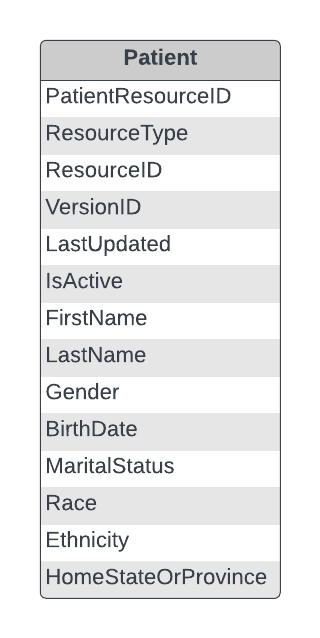

# Exercise 2: Selecting the Standard Attributes

In this exercise we are going to pull out the simple data points we need. This includes building out a supportable ID for the API usage and making sure we grab the latest version of the record. We will also be formatting for data types so it will be better supported when used by a tool like Power BI.

In [55]:
SELECT top (20) p.resourceType + '/' +  p.id as PatientResourceID
    , p.resourceType as ResourceType
    , p.id as ResourceID 
    , cast(p.[meta.versionId] as int) as VersionID 
    , cast(p.[meta.lastUpdated] as DATETIME2(7)) as LastUpdated 
    , cast(p.active as bit) as IsActive
    , p.gender as Gender 
    , CAST(p.birthDate as date) as BirthDate
FROM fhir.Patient p
INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient GROUP BY id) cp
    ON p.[meta.versionId] = cp.currentVersion
    AND p.id = cp.id

Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {9B2822FA-45F6-41B2-9CAE-2AE8FA587420} | Query hash: 0x4C27FC1D36407BC7 | Distributed request ID: {360C8EC4-22DC-47A0-A3CD-A4932ED741BF}. Total size of data scanned is 3 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(12 rows affected)

Total execution time: 00:00:01.182

PatientResourceID,ResourceType,ResourceID,VersionID,LastUpdated,IsActive,Gender,BirthDate
Patient/d5fe6802-a680-e762-8f43-9659340b00ac,Patient,d5fe6802-a680-e762-8f43-9659340b00ac,3,2022-05-18 14:39:52.2550000,NULL,male,1961-06-15
Patient/4d661053-a8d0-148c-7023-54508fd04a52,Patient,4d661053-a8d0-148c-7023-54508fd04a52,1,2022-05-21 13:48:24.9720000,NULL,male,1966-05-07
Patient/ed12d343-fb42-a09c-480e-df2423cc95d3,Patient,ed12d343-fb42-a09c-480e-df2423cc95d3,2,2022-05-21 13:48:25.1900000,NULL,female,2008-08-05
Patient/d8af7bfa-5008-4a0f-85d1-0af3448a31dd,Patient,d8af7bfa-5008-4a0f-85d1-0af3448a31dd,2,2022-05-31 18:07:03.2150000,1,male,1965-07-14
Patient/78cf7725-a0e1-44a4-94d4-055482781afb,Patient,78cf7725-a0e1-44a4-94d4-055482781afb,1,2022-05-31 18:07:30.7490000,NULL,NULL,1990-05-31
Patient/9e909e52-61a1-be50-1878-a12ef8c36346,Patient,9e909e52-61a1-be50-1878-a12ef8c36346,4,2022-05-31 18:39:58.1780000,NULL,male,1988-08-18
Patient/29a819c4-f553-8189-2354-9441b86d37ef,Patient,29a819c4-f553-8189-2354-9441b86d37ef,1,2022-05-18 15:18:40.1560000,NULL,female,1992-03-10
Patient/40d156d6-23f4-57fe-02a7-5ea667b34e82,Patient,40d156d6-23f4-57fe-02a7-5ea667b34e82,2,2022-05-21 13:33:40.7980000,NULL,female,2013-12-24
Patient/64f1c0f1-5dda-9cf5-2673-70f836d6537d,Patient,64f1c0f1-5dda-9cf5-2673-70f836d6537d,2,2022-05-21 13:36:31.8740000,NULL,female,1969-07-01
Patient/f5e6538a-5f48-c489-6f81-f7c5aed74b03,Patient,f5e6538a-5f48-c489-6f81-f7c5aed74b03,4,2022-05-07 08:40:31.7930000,NULL,male,1992-05-15


# Exercise 3: Adding Name

This exercise is the first using JSON. We will use a JSON \_VALUE function to pull out the family and given name from the JSON snippit in the name column. 

Because the name is stored as an array, we have to specify how deep in the array we're going. **We assume that our data set only contains a first level or one member in the array.**

The family name is a single attribute of the name array, but the given name is stored as an array to support multiple given names. **We are going to assume that the first given name is the first name that we want to pull into our data set.**

 **_JSON\_VALUE(p.\[name\], '$\[0\].given\[0\]')_**

In [56]:
SELECT top (20) p.resourceType + '/' +  p.id as PatientResourceID
    , p.resourceType as ResourceType
    , p.id as ResourceID 
    , cast(p.[meta.versionId] as int) as VersionID 
    , cast(p.[meta.lastUpdated] as DATETIME2(7)) as LastUpdated 
    , cast(p.active as bit) as IsActive
    , p.gender as Gender 
    , CAST(p.birthDate as date) as BirthDate
    , JSON_VALUE(p.[name], '$[0].family') as LastName
    , JSON_VALUE(p.[name], '$[0].given[0]') as FirstName
FROM fhir.Patient p
INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient GROUP BY id) cp
    ON p.[meta.versionId] = cp.currentVersion
    AND p.id = cp.id

Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {5D4CDF61-4B66-4ABB-BE99-9DA043A5A2AE} | Query hash: 0x9BCCBC3B46920DB1 | Distributed request ID: {CFC81803-0878-44E5-833B-20C9D4055EE5}. Total size of data scanned is 2 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(12 rows affected)

Total execution time: 00:00:00.851

PatientResourceID,ResourceType,ResourceID,VersionID,LastUpdated,IsActive,Gender,BirthDate,LastName,FirstName
Patient/d5fe6802-a680-e762-8f43-9659340b00ac,Patient,d5fe6802-a680-e762-8f43-9659340b00ac,3,2022-05-18 14:39:52.2550000,NULL,male,1961-06-15,EVERYMAN,ADAM
Patient/4d661053-a8d0-148c-7023-54508fd04a52,Patient,4d661053-a8d0-148c-7023-54508fd04a52,1,2022-05-21 13:48:24.9720000,NULL,male,1966-05-07,Koepp,Gale
Patient/ed12d343-fb42-a09c-480e-df2423cc95d3,Patient,ed12d343-fb42-a09c-480e-df2423cc95d3,2,2022-05-21 13:48:25.1900000,NULL,female,2008-08-05,Gusikowski,Josie
Patient/d8af7bfa-5008-4a0f-85d1-0af3448a31dd,Patient,d8af7bfa-5008-4a0f-85d1-0af3448a31dd,2,2022-05-31 18:07:03.2150000,1,male,1965-07-14,DUCK,DONALD
Patient/78cf7725-a0e1-44a4-94d4-055482781afb,Patient,78cf7725-a0e1-44a4-94d4-055482781afb,1,2022-05-31 18:07:30.7490000,NULL,NULL,1990-05-31,Gretzky,Wayne
Patient/9e909e52-61a1-be50-1878-a12ef8c36346,Patient,9e909e52-61a1-be50-1878-a12ef8c36346,4,2022-05-31 18:39:58.1780000,NULL,male,1988-08-18,EVERYMAN,ADAM
Patient/29a819c4-f553-8189-2354-9441b86d37ef,Patient,29a819c4-f553-8189-2354-9441b86d37ef,1,2022-05-18 15:18:40.1560000,NULL,female,1992-03-10,FORD,ELAINE
Patient/40d156d6-23f4-57fe-02a7-5ea667b34e82,Patient,40d156d6-23f4-57fe-02a7-5ea667b34e82,2,2022-05-21 13:33:40.7980000,NULL,female,2013-12-24,Mitchell,Verline
Patient/64f1c0f1-5dda-9cf5-2673-70f836d6537d,Patient,64f1c0f1-5dda-9cf5-2673-70f836d6537d,2,2022-05-21 13:36:31.8740000,NULL,female,1969-07-01,Rosenbaum,Rosemary
Patient/f5e6538a-5f48-c489-6f81-f7c5aed74b03,Patient,f5e6538a-5f48-c489-6f81-f7c5aed74b03,4,2022-05-07 08:40:31.7930000,NULL,male,1992-05-15,Batz141,Errol226


# Exercise 4: Adding the Home State or Province

Like the name, we will be accessing the home address as an array from the address field. We are trying to identify the home state or province for our record set. The assumption we make with the address field is that **no more than four addresses will be stored** for each Patient in the JSON field. We use a case statement to identify what the usage of the address is, and if it qualifies, we add the state.

In [57]:
SELECT top (20) p.resourceType + '/' +  p.id as PatientResourceID
    , p.resourceType as ResourceType
    , p.id as ResourceID 
    , cast(p.[meta.versionId] as int) as VersionID 
    , cast(p.[meta.lastUpdated] as DATETIME2(7)) as LastUpdated 
    , cast(p.active as bit) as IsActive
    , p.gender as Gender 
    , CAST(p.birthDate as date) as BirthDate
    , JSON_VALUE(p.[name], '$[0].family') as LastName
    , JSON_VALUE(p.[name], '$[0].given[0]') as FirstName
    , CASE WHEN JSON_VALUE(p.[address], '$[0].use') = 'home' THEN JSON_VALUE(p.[address], '$[0].state')
        WHEN JSON_VALUE(p.[address], '$[1].use') = 'home' THEN JSON_VALUE(p.[address], '$[1].state')
        WHEN JSON_VALUE(p.[address], '$[2].use') = 'home' THEN JSON_VALUE(p.[address], '$[2].state')
        WHEN JSON_VALUE(p.[address], '$[3].use') = 'home' THEN JSON_VALUE(p.[address], '$[3].state')
        ELSE NULL
        END as HomeStateOrProvince
FROM fhir.Patient p
INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient GROUP BY id) cp
    ON p.[meta.versionId] = cp.currentVersion
    AND p.id = cp.id

Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {82092F97-CAE5-4558-86B3-5E657AA3A51B} | Query hash: 0x42A5B2BBD26B2548 | Distributed request ID: {F87A9C30-0BAC-4747-B31E-4F6EF2599DDD}. Total size of data scanned is 2 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(12 rows affected)

Total execution time: 00:00:00.761

PatientResourceID,ResourceType,ResourceID,VersionID,LastUpdated,IsActive,Gender,BirthDate,LastName,FirstName,HomeStateOrProvince
Patient/d5fe6802-a680-e762-8f43-9659340b00ac,Patient,d5fe6802-a680-e762-8f43-9659340b00ac,3,2022-05-18 14:39:52.2550000,NULL,male,1961-06-15,EVERYMAN,ADAM,NULL
Patient/4d661053-a8d0-148c-7023-54508fd04a52,Patient,4d661053-a8d0-148c-7023-54508fd04a52,1,2022-05-21 13:48:24.9720000,NULL,male,1966-05-07,Koepp,Gale,NULL
Patient/ed12d343-fb42-a09c-480e-df2423cc95d3,Patient,ed12d343-fb42-a09c-480e-df2423cc95d3,2,2022-05-21 13:48:25.1900000,NULL,female,2008-08-05,Gusikowski,Josie,NULL
Patient/d8af7bfa-5008-4a0f-85d1-0af3448a31dd,Patient,d8af7bfa-5008-4a0f-85d1-0af3448a31dd,2,2022-05-31 18:07:03.2150000,1,male,1965-07-14,DUCK,DONALD,ON
Patient/78cf7725-a0e1-44a4-94d4-055482781afb,Patient,78cf7725-a0e1-44a4-94d4-055482781afb,1,2022-05-31 18:07:30.7490000,NULL,NULL,1990-05-31,Gretzky,Wayne,NULL
Patient/9e909e52-61a1-be50-1878-a12ef8c36346,Patient,9e909e52-61a1-be50-1878-a12ef8c36346,4,2022-05-31 18:39:58.1780000,NULL,male,1988-08-18,EVERYMAN,ADAM,NULL
Patient/29a819c4-f553-8189-2354-9441b86d37ef,Patient,29a819c4-f553-8189-2354-9441b86d37ef,1,2022-05-18 15:18:40.1560000,NULL,female,1992-03-10,FORD,ELAINE,NULL
Patient/40d156d6-23f4-57fe-02a7-5ea667b34e82,Patient,40d156d6-23f4-57fe-02a7-5ea667b34e82,2,2022-05-21 13:33:40.7980000,NULL,female,2013-12-24,Mitchell,Verline,NULL
Patient/64f1c0f1-5dda-9cf5-2673-70f836d6537d,Patient,64f1c0f1-5dda-9cf5-2673-70f836d6537d,2,2022-05-21 13:36:31.8740000,NULL,female,1969-07-01,Rosenbaum,Rosemary,NULL
Patient/f5e6538a-5f48-c489-6f81-f7c5aed74b03,Patient,f5e6538a-5f48-c489-6f81-f7c5aed74b03,4,2022-05-07 08:40:31.7930000,NULL,male,1992-05-15,Batz141,Errol226,NULL


# Exercise 5: Adding Marital Status

Like the state, marital status is an array. We will have to check the **system attribute** in order to capture the right value.

In [58]:
SELECT top (20) p.resourceType + '/' +  p.id as PatientResourceID
    , p.resourceType as ResourceType
    , p.id as ResourceID 
    , cast(p.[meta.versionId] as int) as VersionID 
    , cast(p.[meta.lastUpdated] as DATETIME2(7)) as LastUpdated 
    , cast(p.active as bit) as IsActive
    , p.gender as Gender 
    , CAST(p.birthDate as date) as BirthDate
    , JSON_VALUE(p.[name], '$[0].family') as LastName
    , JSON_VALUE(p.[name], '$[0].given[0]') as FirstName
    , CASE WHEN JSON_VALUE(p.[address], '$[0].use') = 'home' THEN JSON_VALUE(p.[address], '$[0].state')
        WHEN JSON_VALUE(p.[address], '$[1].use') = 'home' THEN JSON_VALUE(p.[address], '$[1].state')
        WHEN JSON_VALUE(p.[address], '$[2].use') = 'home' THEN JSON_VALUE(p.[address], '$[2].state')
        WHEN JSON_VALUE(p.[address], '$[3].use') = 'home' THEN JSON_VALUE(p.[address], '$[3].state')
        ELSE NULL
        END as HomeStateOrProvince
    , CASE WHEN p.[maritalStatus.coding] is null THEN NULL
           WHEN  JSON_VALUE(p.[maritalStatus.coding], '$[0].system') = 'http://terminology.hl7.org/CodeSystem/v3-MaritalStatus' 
           THEN JSON_VALUE(p.[maritalStatus.coding], '$[0].code')
           ELSE NULL
           END as MaritalStatus 
FROM fhir.Patient p
INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient GROUP BY id) cp
    ON p.[meta.versionId] = cp.currentVersion
    AND p.id = cp.id

Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {F94C8E8F-FF3C-4141-8616-001B34AC7621} | Query hash: 0xBD8EAA485B3A78B6 | Distributed request ID: {C6FF0BBE-F4EC-47DF-ACD0-DE9DC66A61EF}. Total size of data scanned is 2 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(12 rows affected)

Total execution time: 00:00:00.925

PatientResourceID,ResourceType,ResourceID,VersionID,LastUpdated,IsActive,Gender,BirthDate,LastName,FirstName,HomeStateOrProvince,MaritalStatus
Patient/d5fe6802-a680-e762-8f43-9659340b00ac,Patient,d5fe6802-a680-e762-8f43-9659340b00ac,3,2022-05-18 14:39:52.2550000,NULL,male,1961-06-15,EVERYMAN,ADAM,NULL,S
Patient/4d661053-a8d0-148c-7023-54508fd04a52,Patient,4d661053-a8d0-148c-7023-54508fd04a52,1,2022-05-21 13:48:24.9720000,NULL,male,1966-05-07,Koepp,Gale,NULL,M
Patient/ed12d343-fb42-a09c-480e-df2423cc95d3,Patient,ed12d343-fb42-a09c-480e-df2423cc95d3,2,2022-05-21 13:48:25.1900000,NULL,female,2008-08-05,Gusikowski,Josie,NULL,S
Patient/d8af7bfa-5008-4a0f-85d1-0af3448a31dd,Patient,d8af7bfa-5008-4a0f-85d1-0af3448a31dd,2,2022-05-31 18:07:03.2150000,1,male,1965-07-14,DUCK,DONALD,ON,NULL
Patient/78cf7725-a0e1-44a4-94d4-055482781afb,Patient,78cf7725-a0e1-44a4-94d4-055482781afb,1,2022-05-31 18:07:30.7490000,NULL,NULL,1990-05-31,Gretzky,Wayne,NULL,NULL
Patient/9e909e52-61a1-be50-1878-a12ef8c36346,Patient,9e909e52-61a1-be50-1878-a12ef8c36346,4,2022-05-31 18:39:58.1780000,NULL,male,1988-08-18,EVERYMAN,ADAM,NULL,M
Patient/29a819c4-f553-8189-2354-9441b86d37ef,Patient,29a819c4-f553-8189-2354-9441b86d37ef,1,2022-05-18 15:18:40.1560000,NULL,female,1992-03-10,FORD,ELAINE,NULL,NULL
Patient/40d156d6-23f4-57fe-02a7-5ea667b34e82,Patient,40d156d6-23f4-57fe-02a7-5ea667b34e82,2,2022-05-21 13:33:40.7980000,NULL,female,2013-12-24,Mitchell,Verline,NULL,S
Patient/64f1c0f1-5dda-9cf5-2673-70f836d6537d,Patient,64f1c0f1-5dda-9cf5-2673-70f836d6537d,2,2022-05-21 13:36:31.8740000,NULL,female,1969-07-01,Rosenbaum,Rosemary,NULL,M
Patient/f5e6538a-5f48-c489-6f81-f7c5aed74b03,Patient,f5e6538a-5f48-c489-6f81-f7c5aed74b03,4,2022-05-07 08:40:31.7930000,NULL,male,1992-05-15,Batz141,Errol226,NULL,M


# Exercise 6: Adding Race and Ethnicity

Race and ethnicity are stored in the extension field with other extensions. In this exercise, we will be interrogating the extension field to find the race and ethnicity attributes based on the US Core Implementation Guide.

In [59]:
SELECT top (20) 
p.id
, ext.* 
FROM fhir.Patient p
CROSS APPLY 
    OPENJSON(p.extension,'$'
    ) as ext


Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {803AAC8B-ADFD-4B8C-8EAD-8D639AFB013B} | Query hash: 0x54821F9BF9217858 | Distributed request ID: {82168B19-6E84-4A66-92BF-6C72E7D0F94E}. Total size of data scanned is 1 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(20 rows affected)

Total execution time: 00:00:00.912

id,key,value,type
d5fe6802-a680-e762-8f43-9659340b00ac,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""code"":""C"",""display"":""C""}},{""url"":""text"",""valueString"":""C""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
4d661053-a8d0-148c-7023-54508fd04a52,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
4d661053-a8d0-148c-7023-54508fd04a52,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2186-5"",""display"":""Not Hispanic or Latino""}},{""url"":""text"",""valueString"":""Not Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5
4d661053-a8d0-148c-7023-54508fd04a52,2,"{""url"":""http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName"",""valueString"":""Tony McGlynn""}",5
4d661053-a8d0-148c-7023-54508fd04a52,3,"{""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-birthsex"",""valueCode"":""M""}",5
4d661053-a8d0-148c-7023-54508fd04a52,4,"{""url"":""http://hl7.org/fhir/StructureDefinition/patient-birthPlace"",""valueAddress"":{""city"":""Marlborough"",""state"":""Massachusetts"",""country"":""US""}}",5
4d661053-a8d0-148c-7023-54508fd04a52,5,"{""url"":""http://synthetichealth.github.io/synthea/disability-adjusted-life-years"",""valueDecimal"":0.0}",5
4d661053-a8d0-148c-7023-54508fd04a52,6,"{""url"":""http://synthetichealth.github.io/synthea/quality-adjusted-life-years"",""valueDecimal"":55.0}",5
ed12d343-fb42-a09c-480e-df2423cc95d3,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
ed12d343-fb42-a09c-480e-df2423cc95d3,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2135-2"",""display"":""Hispanic or Latino""}},{""url"":""text"",""valueString"":""Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5


|  |  |  |  |
| --- | --- | --- | --- |
| <span style="font-size:9.0pt">id<o:p></o:p></span> | <span style="font-size:9.0pt">Key<o:p></o:p></span> | <span style="font-size:9.0pt">value<o:p></o:p></span> | <span style="font-size:9.0pt">type<o:p></o:p></span> |
| <span lang="ES" style="font-size:9.0pt;mso-ansi-language:ES">3e57e734-862f-450d-acab-76811b77f7cb<o:p></o:p></span> | <span style="font-size:9.0pt">0<o:p></o:p></span> | <span style="font-size:9.0pt">{"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race","valueCodeableConcept":{"coding":[{"system":"http://hl7.org/fhir/v3/Race","code":"2106-3","display":"White"}],"text":"race"}}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> |
| <span lang="ES" style="font-size:9.0pt;mso-ansi-language:ES">3e57e734-862f-450d-acab-76811b77f7cb<o:p></o:p></span> | <span style="font-size:9.0pt">1<o:p></o:p></span> | <span style="font-size:9.0pt">{"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity","valueCodeableConcept":{"coding":[{"system":"http://hl7.org/fhir/v3/Ethnicity","code":"2186-5","display":"Nonhispanic"}],"text":"ethnicity"}}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> |
| <span lang="ES" style="font-size:9.0pt;mso-ansi-language:ES">3e57e734-862f-450d-acab-76811b77f7cb<o:p></o:p></span> | <span style="font-size:9.0pt">2<o:p></o:p></span> | <span style="font-size:9.0pt">{"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-birthsex","valueCode":"M"}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> |
| <span style="font-size:9.0pt">f5e6538a-5f48-c489-6f81-f7c5aed74b03<o:p></o:p></span> | <span style="font-size:9.0pt">0<o:p></o:p></span> | <span style="font-size:9.0pt">{"url":"http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName","valueString":"Londa304 Bahringer146"}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> |
| <span style="font-size:9.0pt">f5e6538a-5f48-c489-6f81-f7c5aed74b03<o:p></o:p></span> | <span style="font-size:9.0pt">1<o:p></o:p></span> | <span style="font-size:9.0pt">{"url":"http://hl7.org/fhir/StructureDefinition/patient-birthPlace","valueAddress":{"city":"Harbour Breton","state":"Newfoundland and Labrador","country":"CA"}}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> |
| <span style="font-size:9.0pt">f5e6538a-5f48-c489-6f81-f7c5aed74b03<o:p></o:p></span> | <span style="font-size:9.0pt">2<o:p></o:p></span> | <span style="font-size:9.0pt">{"url":"http://synthetichealth.github.io/synthea/disability-adjusted-life-years","valueDecimal":0.014095725480044528}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> |
| <span style="font-size:9.0pt">f5e6538a-5f48-c489-6f81-f7c5aed74b03<o:p></o:p></span> | <span style="font-size:9.0pt">3<o:p></o:p></span> | <span style="font-size:9.0pt">{"url":"http://synthetichealth.github.io/synthea/quality-adjusted-life-years","valueDecimal":27.985904274519957}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> |

In this step we're going to add three filters to reduce the set for the following criteria:

- Validate the field contains JSON
- Filter for the latest version of the resource
- Narrow down the extensions to the US Core extensions

In [60]:
SELECT top (20)  
p.id
, ext.* 
FROM 
(
    SELECT fp.id, fp.extension FROM fhir.Patient fp
    INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient   GROUP BY id) cp
        ON fp.[meta.versionId] = cp.currentVersion
        AND fp.id = cp.id
    WHERE ISJSON(fp.extension) =1
) p 
CROSS APPLY 
    OPENJSON(p.extension,'$'
    ) as ext


Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {38AF88BD-F883-4E52-8CED-43974C5EBB8D} | Query hash: 0x14C93F6AC87BFF1E | Distributed request ID: {7A8C3D81-8E42-4CDB-8B74-8EBE15B83604}. Total size of data scanned is 3 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(20 rows affected)

Total execution time: 00:00:03.659

id,key,value,type
d5fe6802-a680-e762-8f43-9659340b00ac,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""code"":""C"",""display"":""C""}},{""url"":""text"",""valueString"":""C""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
4d661053-a8d0-148c-7023-54508fd04a52,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
4d661053-a8d0-148c-7023-54508fd04a52,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2186-5"",""display"":""Not Hispanic or Latino""}},{""url"":""text"",""valueString"":""Not Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5
4d661053-a8d0-148c-7023-54508fd04a52,2,"{""url"":""http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName"",""valueString"":""Tony McGlynn""}",5
4d661053-a8d0-148c-7023-54508fd04a52,3,"{""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-birthsex"",""valueCode"":""M""}",5
4d661053-a8d0-148c-7023-54508fd04a52,4,"{""url"":""http://hl7.org/fhir/StructureDefinition/patient-birthPlace"",""valueAddress"":{""city"":""Marlborough"",""state"":""Massachusetts"",""country"":""US""}}",5
4d661053-a8d0-148c-7023-54508fd04a52,5,"{""url"":""http://synthetichealth.github.io/synthea/disability-adjusted-life-years"",""valueDecimal"":0.0}",5
4d661053-a8d0-148c-7023-54508fd04a52,6,"{""url"":""http://synthetichealth.github.io/synthea/quality-adjusted-life-years"",""valueDecimal"":55.0}",5
ed12d343-fb42-a09c-480e-df2423cc95d3,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
ed12d343-fb42-a09c-480e-df2423cc95d3,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2135-2"",""display"":""Hispanic or Latino""}},{""url"":""text"",""valueString"":""Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5


<span style="font-size:11.0pt;line-height:107%;
font-family:&quot;Calibri&quot;,sans-serif;mso-ascii-theme-font:minor-latin;mso-fareast-font-family:
Calibri;mso-fareast-theme-font:minor-latin;mso-hansi-theme-font:minor-latin;
mso-bidi-font-family:Arial;mso-bidi-theme-font:minor-bidi;mso-ansi-language:
EN-US;mso-fareast-language:EN-US;mso-bidi-language:AR-SA">Use the following query with the JSON_VALUE function to validate the URL we are looking for:</span>

In [61]:
SELECT top (20) 
p.id
, JSON_VALUE(ext.value,'$.url') as url 
, ext.* 
FROM 
(
    SELECT fp.id, fp.extension FROM fhir.Patient fp
    INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient   GROUP BY id) cp
        ON fp.[meta.versionId] = cp.currentVersion
        AND fp.id = cp.id
    WHERE ISJSON(fp.extension) =1
) p 
CROSS APPLY 
    OPENJSON(p.extension,'$'
    ) as ext


Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {6D83CF46-1C6B-4A73-AAB4-0AFE27E3541E} | Query hash: 0x7892443C1A0B3E7 | Distributed request ID: {C6A842C1-4CDF-4BF1-A4AE-E11DBFD6E1CC}. Total size of data scanned is 2 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(20 rows affected)

Total execution time: 00:00:00.636

id,url,key,value,type
d5fe6802-a680-e762-8f43-9659340b00ac,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""code"":""C"",""display"":""C""}},{""url"":""text"",""valueString"":""C""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
4d661053-a8d0-148c-7023-54508fd04a52,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
4d661053-a8d0-148c-7023-54508fd04a52,http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2186-5"",""display"":""Not Hispanic or Latino""}},{""url"":""text"",""valueString"":""Not Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5
4d661053-a8d0-148c-7023-54508fd04a52,http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName,2,"{""url"":""http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName"",""valueString"":""Tony McGlynn""}",5
4d661053-a8d0-148c-7023-54508fd04a52,http://hl7.org/fhir/us/core/StructureDefinition/us-core-birthsex,3,"{""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-birthsex"",""valueCode"":""M""}",5
4d661053-a8d0-148c-7023-54508fd04a52,http://hl7.org/fhir/StructureDefinition/patient-birthPlace,4,"{""url"":""http://hl7.org/fhir/StructureDefinition/patient-birthPlace"",""valueAddress"":{""city"":""Marlborough"",""state"":""Massachusetts"",""country"":""US""}}",5
4d661053-a8d0-148c-7023-54508fd04a52,http://synthetichealth.github.io/synthea/disability-adjusted-life-years,5,"{""url"":""http://synthetichealth.github.io/synthea/disability-adjusted-life-years"",""valueDecimal"":0.0}",5
4d661053-a8d0-148c-7023-54508fd04a52,http://synthetichealth.github.io/synthea/quality-adjusted-life-years,6,"{""url"":""http://synthetichealth.github.io/synthea/quality-adjusted-life-years"",""valueDecimal"":55.0}",5
ed12d343-fb42-a09c-480e-df2423cc95d3,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5
ed12d343-fb42-a09c-480e-df2423cc95d3,http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2135-2"",""display"":""Hispanic or Latino""}},{""url"":""text"",""valueString"":""Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5


Now that we know we are returning the correct URL value, we can use the function that we created in a filter for the entire select to only return those values from US Core that we're looking for. The updated query is below:

In [ ]:
SELECT top (20) 
p.id
, JSON_VALUE(ext.value,'$.url') as url 
, ext.* 
FROM 
(
    SELECT fp.id, fp.extension FROM fhir.Patient fp
    INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient   GROUP BY id) cp
        ON fp.[meta.versionId] = cp.currentVersion
        AND fp.id = cp.id
    WHERE ISJSON(fp.extension) =1
) p 
CROSS APPLY 
    OPENJSON(p.extension,'$'
    ) as ext
WHERE JSON_VALUE(ext.value,'$.url') LIKE 'http://hl7.org/fhir/us/core/%'


<span style="font-size:11.0pt;line-height:107%;
font-family:&quot;Calibri&quot;,sans-serif;mso-ascii-theme-font:minor-latin;mso-fareast-font-family:
Calibri;mso-fareast-theme-font:minor-latin;mso-hansi-theme-font:minor-latin;
mso-bidi-font-family:Arial;mso-bidi-theme-font:minor-bidi;mso-ansi-language:
EN-US;mso-fareast-language:EN-US;mso-bidi-language:AR-SA">In this case we will evaluate for race. Update your query to the following syntax to reduce this set to race only.</span>

In [62]:
SELECT  
p.id
, ext.* 
, JSON_VALUE(ext.value,'$.url') as url 
FROM 
(
    SELECT fp.id, fp.extension FROM fhir.Patient fp
    INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient   GROUP BY id) cp
        ON fp.[meta.versionId] = cp.currentVersion
        AND fp.id = cp.id
    WHERE ISJSON(fp.extension) =1
) p 
CROSS APPLY 
    OPENJSON(p.extension,'$'
    ) as ext
WHERE JSON_VALUE(ext.value,'$.url') = 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-race'


Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {F2E4278E-3B23-4EC4-93A8-C742396FD938} | Query hash: 0xBD03D5A215799D8C | Distributed request ID: {8029F53C-2669-43CD-9E63-A0852A2F38C2}. Total size of data scanned is 2 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(6 rows affected)

Total execution time: 00:00:00.881

id,key,value,type,url
ed12d343-fb42-a09c-480e-df2423cc95d3,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race
d5fe6802-a680-e762-8f43-9659340b00ac,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""code"":""C"",""display"":""C""}},{""url"":""text"",""valueString"":""C""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race
4d661053-a8d0-148c-7023-54508fd04a52,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race
9e909e52-61a1-be50-1878-a12ef8c36346,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2028-9"",""display"":""Asian""}},{""url"":""text"",""valueString"":""White+Asian""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race
64f1c0f1-5dda-9cf5-2673-70f836d6537d,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race
40d156d6-23f4-57fe-02a7-5ea667b34e82,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race


|  |  |  |  |  |
| --- | --- | --- | --- | --- |
| <span style="font-size:9.0pt">id<o:p></o:p></span> | <span style="font-size:9.0pt">key<o:p></o:p></span> | <span style="font-size:9.0pt">value<o:p></o:p></span> | <span style="font-size:9.0pt">type<o:p></o:p></span> | <span style="font-size:9.0pt">url<o:p></o:p></span> |
|    |  |  |  |  |
|  |  |  | <br> |  |
| <span style="font-size:9.0pt">4d661053-a8d0-148c-7023-54508fd04a52<o:p></o:p></span> | <span style="font-size:9.0pt">0<o:p></o:p></span> | <span style="font-size:9.0pt">{"extension":[{"url":"ombCategory","valueCoding":{"system":"urn:oid:2.16.840.1.113883.6.238","code":"2106-3","display":"White"}},{"url":"text","valueString":"White"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> | <span style="font-size:9.0pt">http://hl7.org/fhir/us/core/StructureDefinition/us-core-race<o:p></o:p></span> |
| <span style="font-size:9.0pt">d5fe6802-a680-e762-8f43-9659340b00ac<o:p></o:p></span> | <span style="font-size:9.0pt">0<o:p></o:p></span> | <span style="font-size:9.0pt">{"extension":[{"url":"ombCategory","valueCoding":{"code":"C","display":"C"}},{"url":"text","valueString":"C"}],"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> | <span style="font-size:9.0pt">http://hl7.org/fhir/us/core/StructureDefinition/us-core-race<o:p></o:p></span> |
| <span style="font-size:9.0pt">c886d6f9-714a-42fc-aae3-2aa1ac019151<o:p></o:p></span> | <span style="font-size:9.0pt">0<o:p></o:p></span> | <span style="font-size:9.0pt">{"url":"http://hl7.org/fhir/us/core/StructureDefinition/us-core-race","valueCodeableConcept":{"coding":[{"system":"http://hl7.org/fhir/v3/Race","code":"2106-3","display":"White"}],"text":"race"}}<o:p></o:p></span> | <span style="font-size:9.0pt">5<o:p></o:p></span> | <span style="font-size:9.0pt">http://hl7.org/fhir/us/core/StructureDefinition/us-core-race<o:p></o:p></span> |

<span style="font-size: 14px;">Let's evaluate the two extension structures. Let's start with the simplest of the two structures. In this structure below, we can see that the code for race is a part of an array. The important part is to understand our business rules and the specification rules that we need to apply. The following content is from the implementation guide (</span>[HL7.FHIR.US.CORE\\US Core Race Extension - FHIR v4.0.1](http://hl7.org/fhir/us/core/StructureDefinition-us-core-race.html#profile-specific-implementation-guidance)<span style="font-size: 14px;">).</span>

## Profile specific implementation guidance

This Complex Extension for race allows one or more race codes of which: 

- Must Support at least one code from OMB 
- Race Categories May include additional race codes from CDC 
- Race Codes Must include text description of race

<span style="font-size: 14px;">The following path would extract the display value for race:</span>

<span style="font-size: 14px;">{</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; "url": "<a href="http://hl7.org/fhir/us/core/StructureDefinition/us-core-race&amp;quot;" data-href="http://hl7.org/fhir/us/core/StructureDefinition/us-core-race&amp;quot;" title="http://hl7.org/fhir/us/core/StructureDefinition/us-core-race&amp;quot;" is-markdown="true" is-absolute="false">http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"</a>,</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; "valueCodeableConcept": {</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; "coding": [</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; {</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "system": "<a href="http://hl7.org/fhir/v3/Race&amp;quot;" data-href="http://hl7.org/fhir/v3/Race&amp;quot;" title="http://hl7.org/fhir/v3/Race&amp;quot;" is-markdown="true" is-absolute="false">http://hl7.org/fhir/v3/Race"</a>,</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "code": "2106-3",</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "display": "White"</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; }</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; ],</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; "text": "race"</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; }</span>

<span style="font-size: 14px;">}</span>

<span style="font-size: 14px;"><br></span>

<span style="font-size: 14px;">The following path would extract the display and code value for race:</span>

<span style="font-size: 14px;"><b><i>JSON_VALUE(ext.value, '$.valueCodeableConcept.coding[0].display')&nbsp;</i></b></span> 

For the example below, we need to interrogate the array to find the value string we are looking for.<span style="font-size: 14px;"><br></span>

<span style="font-size: 14px;">{</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; "extension": [</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; {</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "url": "ombCategory",</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "valueCoding": {</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "system": "urn:oid:2.16.840.1.113883.6.238",</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "code": "2106-3",</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "display": "White"</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; }</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; },</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; {</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "url": "ombCategory",</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "valueCoding": {</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "system": "urn:oid:2.16.840.1.113883.6.238",</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "code": "2028-9",</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "display": "Asian"</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; }</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; },</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; {</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "url": "text",</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; "valueString": "White+Asian"</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; &nbsp; &nbsp; }</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; ],</span>

 <span style="font-size: 14px;">&nbsp; &nbsp; "url": "<a href="http://hl7.org/fhir/us/core/StructureDefinition/us-core-race&amp;quot;" data-href="http://hl7.org/fhir/us/core/StructureDefinition/us-core-race&amp;quot;" title="http://hl7.org/fhir/us/core/StructureDefinition/us-core-race&amp;quot;" is-markdown="true" is-absolute="false">http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"</a></span>

<span style="font-size: 14px;">}</span>

<span style="font-size: 14px;"><br></span>

<span style="font-size: 14px;">Here is an example of a code that would work for the JSON snippet above.</span>

<span style="font-size: 14px;"><b><i>JSON_VALUE(ext.value, '$.extension[2].valueString')&nbsp;</i></b></span> 

<span style="font-size: 14px;"><br></span>

<span style="font-size: 14px;">The issue with this code is that we don't necessarily know the final array position of the value we intend to retrieve. <b>With our current business rules, we want the final result. </b>We don't need the building blocks. We will apply the following business rules to build out our final query:</span>

<span style="font-size: 14px;">•<span style="white-space:pre"> </span>If the OMB category format is not used, we will take the first display value as our data point.</span>

<span style="font-size: 14px;">•<span style="white-space:pre"> </span>If the OMB category is used, we will use the value string property from the extension attribute.</span>

In [63]:
SELECT top (20) 
p.id
, ext.* 
, JSON_VALUE(ext.value,'$.url') as url 
, CASE WHEN JSON_VALUE(ext.value,'$.extension[0].url') = 'ombCategory'
       THEN
       CASE WHEN JSON_VALUE(ext.value, '$.extension[3].valueString') 
       IS NOT NULL THEN  JSON_VALUE(ext.value, '$.extension[3].valueString')
            WHEN JSON_VALUE(ext.value, '$.extension[2].valueString') IS NOT NULL THEN  JSON_VALUE(ext.value, '$.extension[2].valueString')
            WHEN JSON_VALUE(ext.value, '$.extension[1].valueString') IS NOT NULL THEN  JSON_VALUE(ext.value, '$.extension[1].valueString')
            WHEN JSON_VALUE(ext.value, '$.extension[0].valueString') IS NOT NULL THEN  JSON_VALUE(ext.value, '$.extension[0].valueString')
            ELSE JSON_VALUE(ext.value, '$.extension[0].valueCoding.display')
            END
       ELSE JSON_VALUE(ext.value, '$.valueCodeableConcept.coding[0].display')
       END AS Race 
FROM 
(
    SELECT fp.id, fp.extension FROM fhir.Patient fp
    INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient   GROUP BY id) cp
        ON fp.[meta.versionId] = cp.currentVersion
        AND fp.id = cp.id
    WHERE ISJSON(fp.extension) =1
) p 
CROSS APPLY 
    OPENJSON(p.extension,'$'
    ) as ext

WHERE JSON_VALUE(ext.value,'$.url') = 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-race'


Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {3AEA905F-25BF-40AF-BC7E-AD7FCAC10BBB} | Query hash: 0x71281EAB63BBF7D1 | Distributed request ID: {A8DD58B6-4DC0-47AD-A682-BB0D33B1B476}. Total size of data scanned is 2 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(6 rows affected)

Total execution time: 00:00:00.781

id,key,value,type,url,Race
ed12d343-fb42-a09c-480e-df2423cc95d3,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,White
d5fe6802-a680-e762-8f43-9659340b00ac,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""code"":""C"",""display"":""C""}},{""url"":""text"",""valueString"":""C""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,C
4d661053-a8d0-148c-7023-54508fd04a52,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,White
9e909e52-61a1-be50-1878-a12ef8c36346,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2028-9"",""display"":""Asian""}},{""url"":""text"",""valueString"":""White+Asian""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,White+Asian
64f1c0f1-5dda-9cf5-2673-70f836d6537d,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,White
40d156d6-23f4-57fe-02a7-5ea667b34e82,0,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2106-3"",""display"":""White""}},{""url"":""text"",""valueString"":""White""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-race""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-race,White


## Adding Ethnicity

Now that we have solved for race, we need to add ethnicity to the mix. Ethnicity and race follow similar construction and we should be able to use the same code to produce an ethnicity column. Start by updating the where clause from race to ethnicity as shown below:

**_WHERE JSON\_VALUE(ext.value,'$.url') = '[http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity'](http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity&#39;)_**

You should see from the results that the code works. However, we can make the code more efficient by understanding the structure of the data. If you browse out to the implementation guide and review the rules around ethnicity **you will see that only two values are supported**. Also, **only one of those values is valid at any time**. This means that if the array is properly structured, there are only two elements in the array likely in place. This means we can reduce the case statements and simplify the overall code. The updated select statement should look like the following:

In [64]:
SELECT top (20)   
p.id
, ext.* 
, JSON_VALUE(ext.value,'$.url') as url 
, CASE WHEN JSON_VALUE(ext.value,'$.extension[0].url') = 'ombCategory'
       THEN
       CASE WHEN JSON_VALUE(ext.value, '$.extension[1].valueString') IS NOT NULL THEN  JSON_VALUE(ext.value, '$.extension[1].valueString')
            WHEN JSON_VALUE(ext.value, '$.extension[0].valueString') IS NOT NULL THEN  JSON_VALUE(ext.value, '$.extension[0].valueString')
            ELSE JSON_VALUE(ext.value, '$.extension[0].valueCoding.display')
            END
       ELSE JSON_VALUE(ext.value, '$.valueCodeableConcept.coding[0].display')
       END AS Ethnicity 
FROM 
(
    SELECT fp.id, fp.extension FROM fhir.Patient fp
    INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient   GROUP BY id) cp
        ON fp.[meta.versionId] = cp.currentVersion
        AND fp.id = cp.id
    WHERE ISJSON(fp.extension) =1
) p 
CROSS APPLY 
    OPENJSON(p.extension,'$'
    ) as ext

WHERE JSON_VALUE(ext.value,'$.url') = 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity'


Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {EC029878-9CD4-41A6-9477-87B01DE8F9EA} | Query hash: 0xBA5966114317B410 | Distributed request ID: {0A06C381-8FD4-4AFC-82C6-A798CA44B388}. Total size of data scanned is 2 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(5 rows affected)

Total execution time: 00:00:00.799

id,key,value,type,url,Ethnicity
ed12d343-fb42-a09c-480e-df2423cc95d3,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2135-2"",""display"":""Hispanic or Latino""}},{""url"":""text"",""valueString"":""Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity,Hispanic or Latino
4d661053-a8d0-148c-7023-54508fd04a52,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2186-5"",""display"":""Not Hispanic or Latino""}},{""url"":""text"",""valueString"":""Not Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity,Not Hispanic or Latino
9e909e52-61a1-be50-1878-a12ef8c36346,4,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2186-5"",""display"":""Non Hispanic or Latino""}},{""url"":""text"",""valueString"":""Non Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity,Non Hispanic or Latino
64f1c0f1-5dda-9cf5-2673-70f836d6537d,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2186-5"",""display"":""Not Hispanic or Latino""}},{""url"":""text"",""valueString"":""Not Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity,Not Hispanic or Latino
40d156d6-23f4-57fe-02a7-5ea667b34e82,1,"{""extension"":[{""url"":""ombCategory"",""valueCoding"":{""system"":""urn:oid:2.16.840.1.113883.6.238"",""code"":""2135-2"",""display"":""Hispanic or Latino""}},{""url"":""text"",""valueString"":""Hispanic or Latino""}],""url"":""http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity""}",5,http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity,Hispanic or Latino


# The final query with race and ethnicity added

In [65]:
SELECT TOP (20) p.resourceType + '/' +  p.id as PatientResourceID
    , p.resourceType as ResourceType
    , p.id as ResourceID 
    , cast(p.[meta.versionId] as int) as VersionID 
    , cast(p.[meta.lastUpdated] as DATETIME2(7)) as LastUpdated 
    , JSON_VALUE(p.[name], '$[0].family') as LastName
    , JSON_VALUE(p.[name], '$[0].given[0]') as FirstName
    , cast(p.active as bit) as IsActive
    , p.gender as Gender 
    , CAST(p.birthDate as date) as BirthDate
    , CASE WHEN p.[maritalStatus.coding] is null THEN NULL
           WHEN  JSON_VALUE(p.[maritalStatus.coding], '$[0].system') = 'http://terminology.hl7.org/CodeSystem/v3-MaritalStatus' 
                    THEN JSON_VALUE(p.[maritalStatus.coding], '$[0].code')
           ELSE NULL
           END as MaritalStatus 
    , CASE WHEN JSON_VALUE(p.[address], '$[0].use') = 'home' THEN JSON_VALUE(p.[address], '$[0].state')
            WHEN JSON_VALUE(p.[address], '$[1].use') = 'home' THEN JSON_VALUE(p.[address], '$[1].state')
            WHEN JSON_VALUE(p.[address], '$[2].use') = 'home' THEN JSON_VALUE(p.[address], '$[2].state')
            WHEN JSON_VALUE(p.[address], '$[3].use') = 'home' THEN JSON_VALUE(p.[address], '$[3].state')
            ELSE NULL
            END as HomeStateOrProvince
    , e.Ethnicity
    , r.Race
FROM fhir.Patient p
INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient GROUP BY id) cp
    ON p.[meta.versionId] = cp.currentVersion
    AND p.id = cp.id
LEFT JOIN 
    (SELECT p.id
        , CASE WHEN JSON_VALUE(ext.value,'$.extension[0].url') = 'ombCategory'
            THEN
            CASE WHEN JSON_VALUE(ext.value, '$.extension[1].valueString') IS NOT NULL  THEN JSON_VALUE(ext.value, '$.extension[1].valueString')
                    WHEN JSON_VALUE(ext.value, '$.extension[0].valueString') IS NOT    NULL THEN JSON_VALUE(ext.value, '$.extension[0].valueString')
                    ELSE JSON_VALUE(ext.value, '$.extension[0].valueCoding.display')
                    END
            ELSE JSON_VALUE(ext.value, '$.valueCodeableConcept.coding[0].display')
            END AS Ethnicity 
        FROM 
        (
            SELECT fp.id, fp.extension FROM fhir.Patient fp
            INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient GROUP BY id) cp
                ON fp.[meta.versionId] = cp.currentVersion
                AND fp.id = cp.id
            WHERE ISJSON(fp.extension) =1
        ) p 
        CROSS APPLY 
            OPENJSON(p.extension,'$'
            ) as ext
        WHERE JSON_VALUE(ext.value,'$.url') = 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity'
    ) e on e.id = p.id 
LEFT JOIN 
    (SELECT p.id
        , CASE WHEN JSON_VALUE(ext.value,'$.extension[0].url') = 'ombCategory'
            THEN
            CASE WHEN JSON_VALUE(ext.value, '$.extension[3].valueString') IS NOT NULL THEN JSON_VALUE(ext.value, '$.extension[3].valueString')
                    WHEN JSON_VALUE(ext.value, '$.extension[2].valueString') IS NOT NULL THEN JSON_VALUE(ext.value, '$.extension[2].valueString')
                    WHEN JSON_VALUE(ext.value, '$.extension[1].valueString') IS NOT NULL THEN JSON_VALUE(ext.value, '$.extension[1].valueString')
                    WHEN JSON_VALUE(ext.value, '$.extension[0].valueString') IS NOT NULL THEN JSON_VALUE(ext.value, '$.extension[0].valueString')
                    ELSE JSON_VALUE(ext.value, '$.extension[0].valueCoding.display')
                    END
            ELSE JSON_VALUE(ext.value, '$.valueCodeableConcept.coding[0].display')
            END AS Race 
        FROM 
        (
            SELECT fp.id, fp.extension FROM fhir.Patient fp
            INNER JOIN (SELECT id, max([meta.versionId]) as currentVersion FROM fhir.Patient GROUP BY id) cp
                ON fp.[meta.versionId] = cp.currentVersion
                AND fp.id = cp.id
            WHERE ISJSON(fp.extension) =1
        ) p 
        CROSS APPLY 
            OPENJSON(p.extension,'$'
            ) as ext
        WHERE JSON_VALUE(ext.value,'$.url') = 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-race'
    ) as r on r.id = p.id 


Warning: Ignored empty matched file 'Patient/2022'.

Warning: Ignored empty matched file 'Patient/2022/07'.

Warning: Ignored empty matched file 'Patient/2022/07/1de1bc6b8313472188501f74c2c0a7f2'.

Warning: Ignored empty matched file 'Patient/2022/07/7f9eab344a7343e684d486f09df31da3'.

Warning: Ignored empty matched file 'Patient/2022/18'.

Warning: Ignored empty matched file 'Patient/2022/18/2128596dc54444579deb5019db2d6dd5'.

Warning: Ignored empty matched file 'Patient/2022/18/3767846a025d45f9aebfea97cca69a65'.

Warning: Ignored empty matched file 'Patient/2022/18/3f912abd94744fc08e56ce186af16843'.

Warning: Ignored empty matched file 'Patient/2022/18/b3bf584bfda449589993fd17509de391'.

Warning: Ignored empty matched file 'Patient/2022/21'.

Warning: Ignored empty matched file 'Patient/2022/21/3743182bcb4a4cecba29e0df26ec70df'.

Warning: Ignored empty matched file 'Patient/2022/21/6c12eb7016544f4a9e6ccc5a593ad03b'.

Warning: Ignored empty matched file 'Patient/2022/31'.

Warning: Ignored empty matched file 'Patient/2022/31/52b9129fb19a4f8385e6557d73a7ae80'.

Warning: Ignored empty matched file 'Patient/2022/31/84645940d1d048a48eab466ebf60de01'.

Warning: Ignored empty matched file 'Patient/2022/31/a468eac95b0c4f69810e2d2cced73e11'.

Warning: Ignored empty matched file 'Patient/2022/31/f1598b5cc5034f3d8f8d59512ec1c13f'.

Statement ID: {6DA227C3-F5AB-4D07-899F-FCB179324392} | Query hash: 0x68D10CC0B6A27266 | Distributed request ID: {AF40E7C0-DF43-49E9-9E47-9056B64AFCC9}. Total size of data scanned is 5 megabytes, total size of data moved is 1 megabytes, total size of data written is 0 megabytes.

(12 rows affected)

Total execution time: 00:00:05.704

PatientResourceID,ResourceType,ResourceID,VersionID,LastUpdated,LastName,FirstName,IsActive,Gender,BirthDate,MaritalStatus,HomeStateOrProvince,Ethnicity,Race
Patient/64f1c0f1-5dda-9cf5-2673-70f836d6537d,Patient,64f1c0f1-5dda-9cf5-2673-70f836d6537d,2,2022-05-21 13:36:31.8740000,Rosenbaum,Rosemary,NULL,female,1969-07-01,M,NULL,Not Hispanic or Latino,White
Patient/ed12d343-fb42-a09c-480e-df2423cc95d3,Patient,ed12d343-fb42-a09c-480e-df2423cc95d3,2,2022-05-21 13:48:25.1900000,Gusikowski,Josie,NULL,female,2008-08-05,S,NULL,Hispanic or Latino,White
Patient/d8af7bfa-5008-4a0f-85d1-0af3448a31dd,Patient,d8af7bfa-5008-4a0f-85d1-0af3448a31dd,2,2022-05-31 18:07:03.2150000,DUCK,DONALD,1,male,1965-07-14,NULL,ON,NULL,NULL
Patient/78cf7725-a0e1-44a4-94d4-055482781afb,Patient,78cf7725-a0e1-44a4-94d4-055482781afb,1,2022-05-31 18:07:30.7490000,Gretzky,Wayne,NULL,NULL,1990-05-31,NULL,NULL,NULL,NULL
Patient/9e909e52-61a1-be50-1878-a12ef8c36346,Patient,9e909e52-61a1-be50-1878-a12ef8c36346,4,2022-05-31 18:39:58.1780000,EVERYMAN,ADAM,NULL,male,1988-08-18,M,NULL,Non Hispanic or Latino,White+Asian
Patient/585f3cc0-c727-4989-9214-a7a7b60a2ade,Patient,585f3cc0-c727-4989-9214-a7a7b60a2ade,1,2022-05-31 13:14:57.0640000,DUCK,DONALD,1,male,1965-07-15,NULL,ON,NULL,NULL
Patient/f5e6538a-5f48-c489-6f81-f7c5aed74b03,Patient,f5e6538a-5f48-c489-6f81-f7c5aed74b03,4,2022-05-07 08:40:31.7930000,Batz141,Errol226,NULL,male,1992-05-15,M,NULL,NULL,NULL
Patient/29a819c4-f553-8189-2354-9441b86d37ef,Patient,29a819c4-f553-8189-2354-9441b86d37ef,1,2022-05-18 15:18:40.1560000,FORD,ELAINE,NULL,female,1992-03-10,NULL,NULL,NULL,NULL
Patient/d5fe6802-a680-e762-8f43-9659340b00ac,Patient,d5fe6802-a680-e762-8f43-9659340b00ac,3,2022-05-18 14:39:52.2550000,EVERYMAN,ADAM,NULL,male,1961-06-15,S,NULL,NULL,C
Patient/4d661053-a8d0-148c-7023-54508fd04a52,Patient,4d661053-a8d0-148c-7023-54508fd04a52,1,2022-05-21 13:48:24.9720000,Koepp,Gale,NULL,male,1966-05-07,M,NULL,Not Hispanic or Latino,White


# Wrapping It Up

- FHIR is a complex specification that allows for the sophisticated integration of various medical systems
- FHIR is well documented and self documenting
- JSON is a common integration language used in these patterns
- JSON in SQL blends the relational and non relational data worlds together and has use cases outside of FHIR and Healthcare

This notebook will be available at [www.dataonwheels.com](http://www.dataonwheels.com/) in a blog post following this event. Be aware that the data set may not be available as it is an internal 3Cloud data set used for training.

Thanks for joining us today at SQL Saturday. I hope you enjoy the rest of your day!

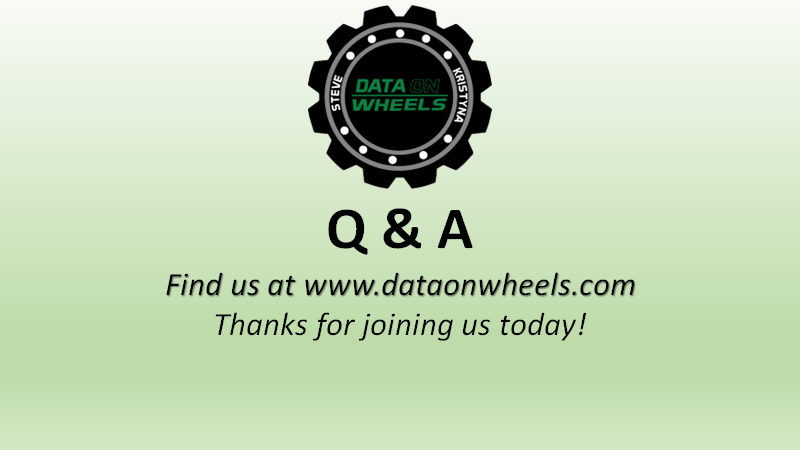